# Service definitions

Feature layers, in addition to features & layer definition, carry a lot of properties that inform client applications about their state, version, capabilities, extent, allowed operations etc, which make up its definition. Head over to the [documentation page](http://resources.arcgis.com/en/help/arcgis-rest-api/index.html#/Feature_Service/02r3000000z2000000/) to know about this in detail.

In [1]:
# connect to your GIS with publisher or higher privileges
from arcgis.gis import GIS
from getpass import getpass

In [2]:
password = getpass()
gis = GIS('https://pycontraptions.maps.arcgis.com', 'atma_mani', password)

········


<Item title:"Ports along west coast" type:Feature Service owner:atma_mani>
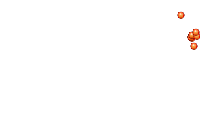

In [4]:
search_result= gis.content.search("Ports along west coast", "Feature Layer")
ports_item = search_result[0]
ports_item

Inspect the properties of [Feature Service](https://services7.arcgis.com/xo9aDUkMXBivHk37/ArcGIS/rest/services/ports_west_USA/FeatureServer)
 - inspect what properties are found on the service vs layer within the service

### Inspect the properties using `FeatureLayerCollection` and `FeatureLayer` objects

In [5]:
from arcgis.features import FeatureLayerCollection
ports_flc = FeatureLayerCollection.fromitem(ports_item)

Inspect the properties of Feature Service using `FeatureLayerCollection.properties`

In [6]:
ports_flc.properties

{
  "supportsApplyEditsWithGlobalIds": false,
  "maxRecordCount": 2000,
  "units": "esriMeters",
  "supportedQueryFormats": "JSON",
  "capabilities": "Query",
  "syncEnabled": false,
  "serviceDescription": "",
  "currentVersion": 10.41,
  "hasStaticData": true,
  "serviceItemId": "8196dd3071b3481e8b1fde551da5772f",
  "allowGeometryUpdates": true,
  "layers": [
    {
      "name": "ports_west_USA",
      "defaultVisibility": true,
      "subLayerIds": null,
      "maxScale": 0,
      "parentLayerId": -1,
      "id": 0,
      "minScale": 73957191,
      "geometryType": "esriGeometryPoint"
    }
  ],
  "supportsDisconnectedEditing": false,
  "initialExtent": {
    "xmax": -13044640.570137383,
    "ymax": 5721784.0173567245,
    "ymin": 2241467.1730974796,
    "xmin": -17764735.368653413,
    "spatialReference": {
      "wkid": 102100,
      "latestWkid": 3857
    }
  },
  "editorTrackingInfo": {
    "enableEditorTracking": false,
    "enableOwnershipAccessControl": false,
    "allowAnony

Now inspect the properties of the feature layer similarly

In [7]:
ports_layer1 = ports_flc.layers[0]
ports_layer1.properties

{
  "name": "ports_west_USA",
  "supportsCalculate": true,
  "objectIdField": "FID",
  "isDataVersioned": false,
  "extent": {
    "xmax": -13044640.570137383,
    "ymax": 5721784.0173567245,
    "ymin": 2241467.1730974796,
    "xmin": -17764735.368653413,
    "spatialReference": {
      "wkid": 102100,
      "latestWkid": 3857
    }
  },
  "relationships": [],
  "drawingInfo": {
    "renderer": {
      "symbol": {
        "contentType": "image/png",
        "height": 15,
        "imageData": "iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAACXBIWXMAAA7DAAAOwwHHb6hkAAAAGXRFWHRTb2Z0d2FyZQBQYWludC5ORVQgdjMuNS4xTuc4+QAAB3VJREFUeF7tmPlTlEcexnve94U5mANQbgQSbgiHXHINlxpRIBpRI6wHorLERUmIisKCQWM8cqigESVQS1Kx1piNi4mW2YpbcZONrilE140RCTcy3DDAcL/zbJP8CYPDL+9Ufau7uqb7eZ7P+/a8PS8hwkcgIBAQCAgEBAICAYGAQEAgIBAQCAgEBAICAYGAQEAgIBAQCDx/AoowKXFMUhD3lQrioZaQRVRS+fxl51eBTZUTdZ41U1Rox13/0JF9csGJ05Qv4jSz/YPWohtvLmSKN5iTGGqTm1+rc6weI

## Update definition of feature service
`FeatureLayerCollection.manager` = [`FeatureLayerCollectionManager`](http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.managers.html#featurelayercollectionmanager) class which can be used to update the definitions of hosted feature services.

In [8]:
ports_flc_mgr = ports_flc.manager
type(ports_flc_mgr)

arcgis.features.managers.FeatureLayerCollectionManager

Both the description and copyright is empty. We can update it by calling the `update_definition()` and passing a dictionary representation of the fields to be updated.

In [17]:
update_dict = {'description':'',
              'copyrightText':''}
ports_flc.manager.update_definition(update_dict)

{'success': True}

Let us access the service definition once again to see if these fields are updated

In [10]:
ports_flc.properties.description

'Updated using ArcGIS Python API'

In [11]:
ports_flc.properties.copyrightText

'hands on class'

### Turning on / off editing and sync capabilities

Capabilities such as editing, sync, query etc. are common to all feature layers in a feature service. Hence you can edit them at the service level

Before updating, you need to know the exact values. Refer to the [REST API doc for Feature Services](http://resources.arcgis.com/en/help/arcgis-rest-api/index.html#/Feature_Service/02r3000000z2000000/)

In [16]:
update_dict2 = {"capabilities": "Query",
               "syncEnabled": False}
ports_flc.manager.update_definition(update_dict2)

{'success': True}

In [13]:
ports_flc.properties.capabilities

'Create,Delete,Query,Update,Editing,Extract'

In [14]:
ports_flc.properties.syncEnabled

False

## Update definition of feature layer
Say you want to add new columns to the feature layer, you need to do that update at the layer level instead of the service level.

Access `FeatureLayer.manager` = [`FeatureLayerManager`](http://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.managers.html#featurelayermanager) to make edits to the definition of the layer

In [61]:
ports_layer1_mgr = ports_layer1.manager
type(ports_layer1_mgr)

arcgis.features.managers.FeatureLayerManager

In [63]:
for field in ports_layer1_mgr.properties.fields:
    print(field['name'])

port_name
country
longitude
latitude
harborsize
label_position
short_form
FID


Let us add a field representing number of ships that can doc at any given time. We will call this `num_docks`.

Let us use a numeric field like 'FID' as a template

In [64]:
import copy
template_field = copy.deepcopy(ports_layer1_mgr.properties.fields[-1]) #its the last field
template_field

{
  "sqlType": "sqlTypeInteger",
  "name": "FID",
  "visible": true,
  "defaultValue": null,
  "nullable": false,
  "alias": "FID",
  "domain": null,
  "actualType": "int",
  "type": "esriFieldTypeInteger",
  "editable": false
}

In [65]:
# edit this field to suit our needs
template_field['name'] = 'num_docks'
template_field['alias'] = 'number of docks'
template_field['nullable'] = True #can be null since this is not primary key
template_field['editable'] = True #can edit, but only if edit capability is turned on
template_field

{
  "sqlType": "sqlTypeInteger",
  "name": "num_docks",
  "visible": true,
  "defaultValue": null,
  "nullable": true,
  "alias": "number of docks",
  "domain": null,
  "actualType": "int",
  "type": "esriFieldTypeInteger",
  "editable": true
}

In [70]:
# now compose the update dictionary
import copy
update_fields = copy.deepcopy(ports_layer1_mgr.properties.fields) #make a copy of all fields
len(update_fields)

8

In [71]:
update_fields.append(template_field)
len(update_fields)

9

In [72]:
update_fields

[{
   "sqlType": "sqlTypeNVarchar",
   "name": "port_name",
   "visible": true,
   "defaultValue": null,
   "type": "esriFieldTypeString",
   "alias": "port_name",
   "domain": null,
   "actualType": "nvarchar",
   "length": 256,
   "nullable": true,
   "editable": true
 }, {
   "sqlType": "sqlTypeNVarchar",
   "name": "country",
   "visible": true,
   "defaultValue": null,
   "type": "esriFieldTypeString",
   "alias": "country",
   "domain": null,
   "actualType": "nvarchar",
   "length": 256,
   "nullable": true,
   "editable": true
 }, {
   "sqlType": "sqlTypeFloat",
   "name": "longitude",
   "visible": true,
   "defaultValue": null,
   "nullable": true,
   "alias": "longitude",
   "domain": null,
   "actualType": "float",
   "type": "esriFieldTypeDouble",
   "editable": true
 }, {
   "sqlType": "sqlTypeFloat",
   "name": "latitude",
   "visible": true,
   "defaultValue": null,
   "nullable": true,
   "alias": "latitude",
   "domain": null,
   "actualType": "float",
   "type": "esr

Need to make dictionary serializable.

In [73]:
type(update_fields[0])

arcgis._impl.common._mixins.PropertyMap

Simply ready each map into a dictionary

In [74]:
new_update_fields = []
for i in update_fields:
    new_update_fields.append(dict(i))

new_update_fields

[{'actualType': 'nvarchar',
  'alias': 'port_name',
  'defaultValue': None,
  'domain': None,
  'editable': True,
  'length': 256,
  'name': 'port_name',
  'nullable': True,
  'sqlType': 'sqlTypeNVarchar',
  'type': 'esriFieldTypeString',
  'visible': True},
 {'actualType': 'nvarchar',
  'alias': 'country',
  'defaultValue': None,
  'domain': None,
  'editable': True,
  'length': 256,
  'name': 'country',
  'nullable': True,
  'sqlType': 'sqlTypeNVarchar',
  'type': 'esriFieldTypeString',
  'visible': True},
 {'actualType': 'float',
  'alias': 'longitude',
  'defaultValue': None,
  'domain': None,
  'editable': True,
  'name': 'longitude',
  'nullable': True,
  'sqlType': 'sqlTypeFloat',
  'type': 'esriFieldTypeDouble',
  'visible': True},
 {'actualType': 'float',
  'alias': 'latitude',
  'defaultValue': None,
  'domain': None,
  'editable': True,
  'name': 'latitude',
  'nullable': True,
  'sqlType': 'sqlTypeFloat',
  'type': 'esriFieldTypeDouble',
  'visible': True},
 {'actualType': 

In [78]:
[new_update_fields[-1]]

[{'actualType': 'int',
  'alias': 'number of docks',
  'defaultValue': None,
  'domain': None,
  'editable': True,
  'name': 'num_docks',
  'nullable': True,
  'sqlType': 'sqlTypeInteger',
  'type': 'esriFieldTypeInteger',
  'visible': True}]

In [79]:
ports_layer1_mgr.add_to_definition({'fields':[new_update_fields[-1]]})

{'success': True}

In [80]:
ports_layer1._refresh()

In [81]:
ports_fset = ports_layer1.query()
ports_fset.df

,country,harborsize,label_position,latitude,longitude,num_boats,num_docks,port_name,short_form,geometry.x,geometry.y
FID,,,,,,,,,,,
1,US,L,SW,37.816667,-122.416667,None,None,SAN FRANCISCO,SFFO,-1.362736e+07,4.553559e+06
2,US,S,SW,37.783333,-122.266667,None,None,ALAMEDA,NGZ,-1.361066e+07,4.548863e+06
3,US,L,SW,37.816667,-122.333333,None,None,OAKLAND,OAK,-1.361808e+07,4.553559e+06
4,US,S,SW,37.916667,-122.366667,None,None,POINT RICHMOND,RIC,-1.362180e+07,4.567660e+06
5,US,S,SW,38.100000,-122.266667,None,None,MARE ISLAND,None,-1.361066e+07,4.593562e+06
6,US,S,SW,38.083333,-122.250000,None,None,SOUTH VALLEJO,None,-1.360881e+07,4.591205e+06
7,US,S,SW,37.950000,-121.300000,None,None,STOCKTON,SCK,-1.350305e+07,4.572365e+06
8,US,S,SW,38.583333,-121.500000,None,None,SACRAMENTO,SMF,-1.352532e+07,4.662162e+06
9,US,S,SW,40.800000,-124.183333,None,None,EUREKA,ACV,-1.382403e+07,4.982886e+06


### Delete fields from feature layer
use the `delete_from_definition()` method.

In [82]:
fields_to_delete = [{'name':'num_boats',
                    'name':'num_docks'}]
ports_layer1_mgr.delete_from_definition({'fields':fields_to_delete})

{'success': True}